# File Contents,

A . EDA ( Exploratory Data Analysis)

B . Data Wrangling

C . Data Visualization

D. Modeling and Predicting

In [36]:
# Import Libraries
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
from nltk import FreqDist
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim


warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [37]:
# Import Dataset
train  = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [38]:
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [39]:
test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,...,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,...,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,...,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,...,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,...,0,0,0,0,0,0,0,0,0,0


In [40]:
train.shape

(116058, 29)

In [41]:
test.shape

(35866, 28)

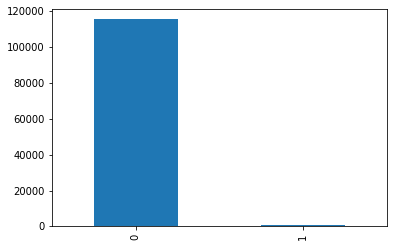

In [42]:
train['m13'].value_counts().plot.bar()

In [43]:
train[train.m13==0].shape[0]

115422

In [44]:
train[train.m13==1].shape[0]

636

In [45]:
# or
train['m13'].value_counts()

0    115422
1       636
Name: m13, dtype: int64

In [46]:
cols = train.columns
num_cols = train._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [47]:
cat_cols

['first_payment_date',
 'loan_purpose',
 'source',
 'financial_institution',
 'origination_date']

In [48]:
num_cols

Index(['loan_id', 'interest_rate', 'unpaid_principal_bal', 'loan_term',
       'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio',
       'borrower_credit_score', 'insurance_percent',
       'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13'],
      dtype='object')

In [49]:
def plot_fig(list1):
    for i in range(len(list1)):
        fig = plt.figure(figsize=(20, 10))
        fig.add_subplot(8, 2, i+1)
        train[list1[i]].value_counts(normalize=True).plot.bar(title= list1[i]) 
#         plt.imshow(img)
    plt.show()

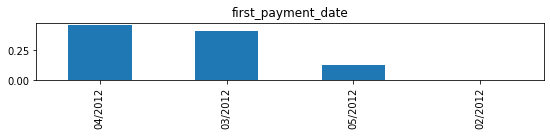

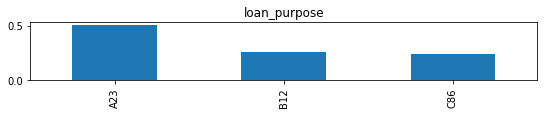

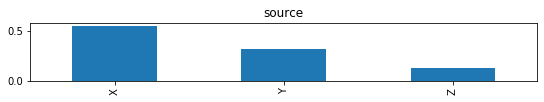

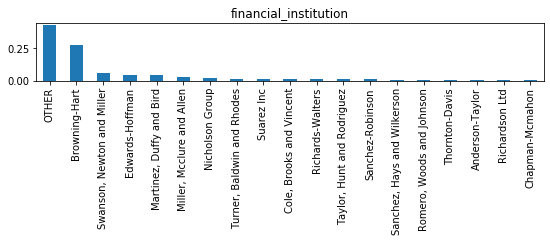

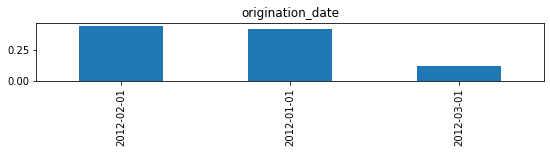

In [50]:
plot_fig(cat_cols)

In [51]:
def counts(list1):
    for i in list1:
        print(i)
        print(train[i].value_counts())
        print()
counts(cat_cols)

first_payment_date
04/2012    52840
03/2012    47680
05/2012    15014
02/2012      524
Name: first_payment_date, dtype: int64

loan_purpose
A23    58462
B12    29383
C86    28213
Name: loan_purpose, dtype: int64

source
X    63858
Y    37554
Z    14646
Name: source, dtype: int64

financial_institution
OTHER                          49699
Browning-Hart                  31852
Swanson, Newton and Miller      6874
Edwards-Hoffman                 4857
Martinez, Duffy and Bird        4715
Miller, Mcclure and Allen       3158
Nicholson Group                 2116
Turner, Baldwin and Rhodes      1846
Suarez Inc                      1790
Cole, Brooks and Vincent        1642
Richards-Walters                1459
Taylor, Hunt and Rodriguez      1259
Sanchez-Robinson                1193
Sanchez, Hays and Wilkerson      853
Romero, Woods and Johnson        750
Thornton-Davis                   651
Anderson-Taylor                  483
Richardson Ltd                   473
Chapman-Mcmahon                

In [52]:
for j in cat_cols:
    lista = list(train[j])
    listb = []
    for i in lista:
        if i not in listb:
            listb.append(i)
    
    for k in range(len(listb)):
        train[j].replace(to_replace=listb[k], value= k, regex=True, inplace=True)
        

In [53]:
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,0,0,4.250,214000,360,0,0,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,1,1,4.875,144000,360,1,1,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,0,2,3.250,366000,180,1,1,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,2,3,4.750,135000,360,2,2,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,2,3,4.750,124000,360,2,2,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [54]:
data_num = train
data_num.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,0,0,4.250,214000,360,0,0,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,1,1,4.875,144000,360,1,1,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,0,2,3.250,366000,180,1,1,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,2,3,4.750,135000,360,2,2,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,2,3,4.750,124000,360,2,2,80,1.0,...,3,4,5,6,7,8,9,10,11,1


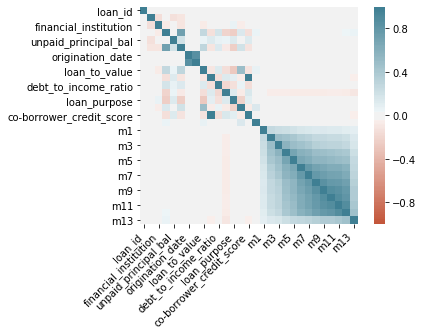

In [55]:
# plot heatmap
corr = data_num.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [56]:
# Step 1 - Make a scatter plot with square markers, set column names as labels

def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

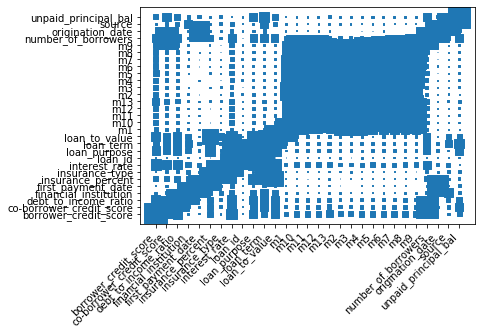

In [57]:
corr = data_num.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

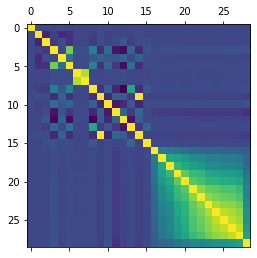

In [58]:
plt.matshow(data_num.corr())
plt.show()

In [59]:
corr = data_num.corr()
corr.style.background_gradient(cmap='coolwarm')

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
loan_id,1,0.00244018,-0.00428116,-0.000901591,0.00538548,-0.00127712,-0.00250336,-0.00178284,0.000760601,0.0017386,0.00389445,0.00122987,-0.00167265,0.000948311,0.00191887,-3.17254e-05,0.000389499,-0.00711842,-0.000103747,-0.0075632,-0.00562634,-0.00596768,-0.00666828,-0.00279273,-0.0038489,-0.00236163,-0.00411588,-0.00357229,-0.00298194
source,0.00244018,1,-0.145322,-0.0315583,-0.124162,-0.105649,-0.00643152,-0.00387065,-0.0370797,0.0275808,-0.0317391,-0.0101705,-0.00724845,-0.00999235,0.0263141,-0.0195886,-0.0058506,-0.00602959,-0.00311096,-0.002612,-0.00293726,-0.0029801,-0.0020353,-0.00188669,-0.001978,-0.00425501,-0.00231381,-0.00321867,-0.00806287
financial_institution,-0.00428116,-0.145322,1,-0.0626268,0.0225326,-0.10423,-0.00895809,-0.0118338,-0.0626881,0.0147562,-0.0105717,0.0118933,0.069842,-0.0469939,0.0155786,0.0311456,-0.00825258,-0.00541749,-0.00248267,-0.000526198,-0.00191811,-0.00547967,-0.00367331,-0.0069249,-0.00490403,-0.00610159,-0.00284046,-0.00379745,-0.00757484
interest_rate,-0.000901591,-0.0315583,-0.0626268,1,-0.00285412,0.720734,0.02167,0.0300342,0.273379,-0.128075,0.181988,-0.210468,-0.244309,0.143116,-0.138013,0.0558826,0.0174197,0.0260919,0.0267274,0.0305431,0.0357264,0.0343114,0.0321332,0.0353931,0.0358408,0.0379944,0.0370515,0.0397083,0.0542977
unpaid_principal_bal,0.00538548,-0.124162,0.0225326,-0.00285412,1,0.192168,0.0189434,0.0196779,0.0624471,0.130565,0.0734147,0.0520606,0.129275,0.010926,0.132632,0.015985,0.00134253,-0.00400149,-0.00602627,-0.0103439,-0.0114607,-0.00781391,-0.00891152,-0.00922849,-0.00898338,-0.00586591,-0.00641176,-0.00825376,-0.0171197
loan_term,-0.00127712,-0.105649,-0.10423,0.720734,0.192168,1,0.0196871,0.0208055,0.292565,-0.107341,0.137852,-0.0720212,-0.241444,0.190762,-0.110268,0.0287312,0.00897553,0.0117393,0.010129,0.0116882,0.0136451,0.0116221,0.0114058,0.0129541,0.0140312,0.0155096,0.014814,0.0157733,0.0235015
origination_date,-0.00250336,-0.00643152,-0.00895809,0.02167,0.0189434,0.0196871,1,0.851633,-0.000801483,-0.00914257,0.00284788,0.00634559,0.0157815,-0.00740615,-0.00895932,-0.00920581,0.00266922,0.00155244,0.000816469,0.00157656,-0.000636877,0.00344407,0.0001356,0.00100682,-0.000202072,0.0018181,0.00215622,0.00295375,0.00329543
first_payment_date,-0.00178284,-0.00387065,-0.0118338,0.0300342,0.0196779,0.0208055,0.851633,1,0.00651056,-0.00872828,0.00385499,0.0034399,0.00983967,-0.000547258,-0.00863693,-0.00617801,0.00344345,0.00118408,-0.000156323,0.00262372,0.000546247,0.00126796,0.00136692,0.00178634,-3.27034e-05,0.00205189,0.00299579,0.00238166,0.00416114
loan_to_value,0.000760601,-0.0370797,-0.0626881,0.273379,0.0624471,0.292565,-0.000801483,0.00651056,1,-0.100898,0.126993,-0.142574,-0.278402,0.490128,-0.109546,0.0758131,0.0023026,0.00893771,0.00707602,0.00982564,0.00692782,0.0105605,0.0102431,0.00993758,0.00877504,0.0111029,0.0108561,0.0108112,0.0163567
number_of_borrowers,0.0017386,0.0275808,0.0147562,-0.128075,0.130565,-0.107341,-0.00914257,-0.00872828,-0.100898,1,-0.134395,0.12012,0.101026,-0.0589763,0.996498,-0.0157691,-0.0194003,-0.0207419,-0.0189365,-0.0234417,-0.0246652,-0.0223366,-0.0237159,-0.0274718,-0.0280335,-0.0259464,-0.0276081,-0.0296611,-0.0399789


In [60]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
loan_id,1,0.0024,-0.0043,-0.0009,0.0054,-0.0013,-0.0025,-0.0018,0.00076,0.0017,0.0039,0.0012,-0.0017,0.00095,0.0019,-3.2e-05,0.00039,-0.0071,-0.0001,-0.0076,-0.0056,-0.006,-0.0067,-0.0028,-0.0038,-0.0024,-0.0041,-0.0036,-0.003
source,0.0024,1,-0.15,-0.032,-0.12,-0.11,-0.0064,-0.0039,-0.037,0.028,-0.032,-0.01,-0.0072,-0.01,0.026,-0.02,-0.0059,-0.006,-0.0031,-0.0026,-0.0029,-0.003,-0.002,-0.0019,-0.002,-0.0043,-0.0023,-0.0032,-0.0081
financial_institution,-0.0043,-0.15,1,-0.063,0.023,-0.1,-0.009,-0.012,-0.063,0.015,-0.011,0.012,0.07,-0.047,0.016,0.031,-0.0083,-0.0054,-0.0025,-0.00053,-0.0019,-0.0055,-0.0037,-0.0069,-0.0049,-0.0061,-0.0028,-0.0038,-0.0076
interest_rate,-0.0009,-0.032,-0.063,1,-0.0029,0.72,0.022,0.03,0.27,-0.13,0.18,-0.21,-0.24,0.14,-0.14,0.056,0.017,0.026,0.027,0.031,0.036,0.034,0.032,0.035,0.036,0.038,0.037,0.04,0.054
unpaid_principal_bal,0.0054,-0.12,0.023,-0.0029,1,0.19,0.019,0.02,0.062,0.13,0.073,0.052,0.13,0.011,0.13,0.016,0.0013,-0.004,-0.006,-0.01,-0.011,-0.0078,-0.0089,-0.0092,-0.009,-0.0059,-0.0064,-0.0083,-0.017
loan_term,-0.0013,-0.11,-0.1,0.72,0.19,1,0.02,0.021,0.29,-0.11,0.14,-0.072,-0.24,0.19,-0.11,0.029,0.009,0.012,0.01,0.012,0.014,0.012,0.011,0.013,0.014,0.016,0.015,0.016,0.024
origination_date,-0.0025,-0.0064,-0.009,0.022,0.019,0.02,1,0.85,-0.0008,-0.0091,0.0028,0.0063,0.016,-0.0074,-0.009,-0.0092,0.0027,0.0016,0.00082,0.0016,-0.00064,0.0034,0.00014,0.001,-0.0002,0.0018,0.0022,0.003,0.0033
first_payment_date,-0.0018,-0.0039,-0.012,0.03,0.02,0.021,0.85,1,0.0065,-0.0087,0.0039,0.0034,0.0098,-0.00055,-0.0086,-0.0062,0.0034,0.0012,-0.00016,0.0026,0.00055,0.0013,0.0014,0.0018,-3.3e-05,0.0021,0.003,0.0024,0.0042
loan_to_value,0.00076,-0.037,-0.063,0.27,0.062,0.29,-0.0008,0.0065,1,-0.1,0.13,-0.14,-0.28,0.49,-0.11,0.076,0.0023,0.0089,0.0071,0.0098,0.0069,0.011,0.01,0.0099,0.0088,0.011,0.011,0.011,0.016
number_of_borrowers,0.0017,0.028,0.015,-0.13,0.13,-0.11,-0.0091,-0.0087,-0.1,1,-0.13,0.12,0.1,-0.059,1,-0.016,-0.019,-0.021,-0.019,-0.023,-0.025,-0.022,-0.024,-0.027,-0.028,-0.026,-0.028,-0.03,-0.04


In [61]:
data_num[data_num.columns[1:]].corr()['m13'][:]

source                     -0.008063
financial_institution      -0.007575
interest_rate               0.054298
unpaid_principal_bal       -0.017120
loan_term                   0.023502
origination_date            0.003295
first_payment_date          0.004161
loan_to_value               0.016357
number_of_borrowers        -0.039979
debt_to_income_ratio        0.038033
borrower_credit_score      -0.094215
loan_purpose               -0.022773
insurance_percent           0.005722
co-borrower_credit_score   -0.042651
insurance_type              0.005999
m1                          0.092054
m2                          0.146921
m3                          0.157394
m4                          0.218956
m5                          0.259529
m6                          0.287712
m7                          0.309072
m8                          0.339362
m9                          0.369138
m10                         0.367840
m11                         0.410213
m12                         0.466442
m

In [62]:
# Create correlation matrix
corr_matrix = data_num.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

to_drop

['co-borrower_credit_score']

In [63]:
# Missing Values imputation
cols = list(train.columns.values)
cols = cols[:-1]
for col in cols:
    print('Imputation with Median: %s' % (col))
    train[col].fillna(train[col].median(), inplace=True)
train.head()   

Imputation with Median: loan_id
Imputation with Median: source
Imputation with Median: financial_institution
Imputation with Median: interest_rate
Imputation with Median: unpaid_principal_bal
Imputation with Median: loan_term
Imputation with Median: origination_date
Imputation with Median: first_payment_date
Imputation with Median: loan_to_value
Imputation with Median: number_of_borrowers
Imputation with Median: debt_to_income_ratio
Imputation with Median: borrower_credit_score
Imputation with Median: loan_purpose
Imputation with Median: insurance_percent
Imputation with Median: co-borrower_credit_score
Imputation with Median: insurance_type
Imputation with Median: m1
Imputation with Median: m2
Imputation with Median: m3
Imputation with Median: m4
Imputation with Median: m5
Imputation with Median: m6
Imputation with Median: m7
Imputation with Median: m8
Imputation with Median: m9
Imputation with Median: m10
Imputation with Median: m11
Imputation with Median: m12


,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,0,0,4.250,214000,360,0,0,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,1,1,4.875,144000,360,1,1,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,0,2,3.250,366000,180,1,1,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,2,3,4.750,135000,360,2,2,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,2,3,4.750,124000,360,2,2,80,1.0,...,3,4,5,6,7,8,9,10,11,1


# Feature Engineering

In [64]:
# doing all the same for test dataframe
cols = test.columns
num_cols = test._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

for j in cat_cols:
    lista = list(test[j])
    listb = []
    for i in lista:
        if i not in listb:
            listb.append(i)
    
    for k in range(len(listb)):
        test[j].replace(to_replace=listb[k], value= k, regex=True, inplace=True)
 
# Missing Values imputation
cols = list(test.columns.values)
for col in cols:
    print('Imputation with Median: %s' % (col))
    test[col].fillna(test[col].median(), inplace=True)
test.head() 


Imputation with Median: loan_id
Imputation with Median: source
Imputation with Median: financial_institution
Imputation with Median: interest_rate
Imputation with Median: unpaid_principal_bal
Imputation with Median: loan_term
Imputation with Median: origination_date
Imputation with Median: first_payment_date
Imputation with Median: loan_to_value
Imputation with Median: number_of_borrowers
Imputation with Median: debt_to_income_ratio
Imputation with Median: borrower_credit_score
Imputation with Median: loan_purpose
Imputation with Median: insurance_percent
Imputation with Median: co-borrower_credit_score
Imputation with Median: insurance_type
Imputation with Median: m1
Imputation with Median: m2
Imputation with Median: m3
Imputation with Median: m4
Imputation with Median: m5
Imputation with Median: m6
Imputation with Median: m7
Imputation with Median: m8
Imputation with Median: m9
Imputation with Median: m10
Imputation with Median: m11
Imputation with Median: m12


,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,0,0,3.875,417000,360,0,0,75,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,4.500,113000,360,0,0,80,2,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,4.500,72000,360,1,1,75,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,2,4.125,123000,180,0,0,41,2,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,3.250,166000,180,0,0,53,2,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Separating the member_id column of test dataframe to help create a csv after predictions
test_loan_id = pd.DataFrame(test['loan_id'])


# Creating target variable pandas series from train dataframe, this will be used by cross validation to calculate
# the accuracy of the model
train_target = pd.DataFrame(train['m13'])
final_train = train[cols]
finalTest = test
# final_train.head()


In [66]:
# Split data set into train-test-cv Train model & predict
from datetime import datetime
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Split train and cross validation sets
X_train, X_test, y_train, y_test = train_test_split(np.array(final_train), np.array(train_target), test_size=0.30)
eval_set=[(X_test, y_test)]

Initializing xgboost.sklearn.XGBClassifier and starting training...


/home/kuamrgaurav/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kuamrgaurav/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.768138
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.789814
[2]	validation_0-auc:0.789785
[3]	validation_0-auc:0.789814
[4]	validation_0-auc:0.789792
[5]	validation_0-auc:0.789792
[6]	validation_0-auc:0.789795
[7]	validation_0-auc:0.789795
[8]	validation_0-auc:0.789841
[9]	validation_0-auc:0.789841
[10]	validation_0-auc:0.789837
[11]	validation_0-auc:0.789837
[12]	validation_0-auc:0.789837
[13]	validation_0-auc:0.789838
[14]	validation_0-auc:0.789837
[15]	validation_0-auc:0.795021
[16]	validation_0-auc:0.795015
[17]	validation_0-auc:0.795027
[18]	validation_0-auc:0.795015
[19]	validation_0-auc:0.79503
[20]	validation_0-auc:0.79503
[21]	validation_0-auc:0.79503
[22]	validation_0-auc:0.795031
[23]	validation_0-auc:0.800307
[24]	validation_0-auc:0.800307
[25]	validation_0-auc:0.800306
[26]	validation_0-auc:0.800306
[27]	validation_0-auc:0.805596
[28]	validation_0-auc:0.805596
[29]	validation_0-auc:0.805624
[30]	validation_0-a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/home/kuamrgaurav/.local/lib/python3.6/site-packages/pandas/core/indexing.py:808: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


[0.01976308 0.01761352 0.01636778 0.02396466 0.02504315 0.02569447
 0.03075094 0.01637235 0.01421192 0.         0.02380866 0.05309329
 0.02138384 0.         0.04218524 0.01519797 0.02245014 0.02718602
 0.01469996 0.03294023 0.0381375  0.         0.04301956 0.03762288
 0.04410266 0.05485507 0.08882273 0.2507123 ]
0 loan_id
1 source
2 financial_institution
3 interest_rate
4 unpaid_principal_bal
5 loan_term
6 origination_date
7 first_payment_date
8 loan_to_value
9 number_of_borrowers
10 debt_to_income_ratio
11 borrower_credit_score
12 loan_purpose
13 insurance_percent
14 co-borrower_credit_score
15 insurance_type
16 m1
17 m2
18 m3
19 m4
20 m5
21 m6
22 m7
23 m8
24 m9
25 m10
26 m11
27 m12


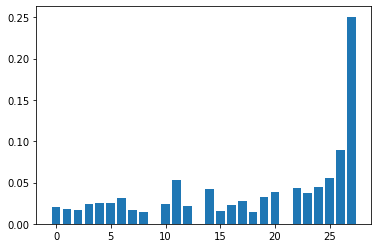

In [67]:

print('Initializing xgboost.sklearn.XGBClassifier and starting training...')

st = datetime.now()

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)

clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)

print(datetime.now()-st)

y_pred = clf.predict(X_test)
submission_file_name = 'Submission_1_'

accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
print("Accuracy: %.10f%%" % (accuracy * 100.0))
submission_file_name = submission_file_name + ("_Accuracy_%.6f" % (accuracy * 100)) + '_'

accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
submission_file_name = submission_file_name + ("_ROC-AUC_%.6f" % (accuracy_per_roc_auc * 100))

final_pred = pd.DataFrame(clf.predict_proba(np.array(finalTest)))
dfSub = pd.concat([test_loan_id, final_pred.ix[:, 1:2]], axis=1)
dfSub.rename(columns={1:'m13'}, inplace=True)
listc = list(dfSub['m13'])
for i in range(len(listc)):
    if (listc[i] < 0.3):
        listc[i] = 0
    else:
        listc[i] = 1

dfSub['m13'] = listc
dfSub.to_csv((('%s.csv') % (submission_file_name)), index=False)

import matplotlib.pyplot as plt
print(clf.feature_importances_)
idx = 0
for x in list(final_train):
    print('%d %s' % (idx, x))
    idx = idx + 1
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

In [68]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

/home/kuamrgaurav/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Initializing xgboost.sklearn.XGBClassifier and starting training...


/home/kuamrgaurav/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.844813
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.84527
[2]	validation_0-auc:0.838573
[3]	validation_0-auc:0.833475
[4]	validation_0-auc:0.844506
[5]	validation_0-auc:0.852864
[6]	validation_0-auc:0.857603
[7]	validation_0-auc:0.859164
[8]	validation_0-auc:0.860095
[9]	validation_0-auc:0.860106
[10]	validation_0-auc:0.8613
[11]	validation_0-auc:0.861992
[12]	validation_0-auc:0.864147
[13]	validation_0-auc:0.86413
[14]	validation_0-auc:0.865702
[15]	validation_0-auc:0.866273
[16]	validation_0-auc:0.867573
[17]	validation_0-auc:0.867928
[18]	validation_0-auc:0.869854
[19]	validation_0-auc:0.872054
[20]	validation_0-auc:0.87889
[21]	validation_0-auc:0.87982
[22]	validation_0-auc:0.881789
[23]	validation_0-auc:0.880779
[24]	validation_0-auc:0.881717
[25]	validation_0-auc:0.882332
[26]	validation_0-auc:0.881794
[27]	validation_0-auc:0.882045
[28]	validation_0-auc:0.881651
[29]	validation_0-auc:0.88042
[30]	validation_0-auc:0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/home/kuamrgaurav/.local/lib/python3.6/site-packages/pandas/core/indexing.py:808: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


[2.0285472e-03 1.1303629e-02 1.2592284e-03 1.5994597e-03 8.9192129e-04
 1.4714332e-03 3.2552404e-03 4.2389841e-03 1.0333040e-03 7.0678726e-02
 9.6872752e-04 1.9929724e-02 4.7253123e-03 1.3787962e-03 1.2616616e-03
 5.8864808e-04 1.1103252e-03 2.0191832e-03 1.4744187e-04 1.1848359e-03
 3.7441943e-03 3.0198947e-03 1.9656918e-03 5.3309789e-03 4.1702017e-03
 8.2588717e-02 4.2803274e-03 7.6382488e-01]
0 loan_id
1 source
2 financial_institution
3 interest_rate
4 unpaid_principal_bal
5 loan_term
6 origination_date
7 first_payment_date
8 loan_to_value
9 number_of_borrowers
10 debt_to_income_ratio
11 borrower_credit_score
12 loan_purpose
13 insurance_percent
14 co-borrower_credit_score
15 insurance_type
16 m1
17 m2
18 m3
19 m4
20 m5
21 m6
22 m7
23 m8
24 m9
25 m10
26 m11
27 m12


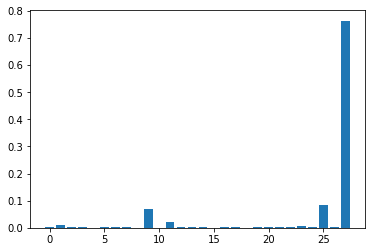

In [69]:
print('Initializing xgboost.sklearn.XGBClassifier and starting training...')

st = datetime.now()

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)

clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)

print(datetime.now()-st)

y_pred = clf.predict(X_test)
submission_file_name = 'Submission_'

accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
print("Accuracy: %.10f%%" % (accuracy * 100.0))
submission_file_name = submission_file_name + ("_Accuracy_%.6f" % (accuracy * 100)) + '_'

accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
submission_file_name = submission_file_name + ("_ROC-AUC_%.6f" % (accuracy_per_roc_auc * 100))

final_pred = pd.DataFrame(clf.predict_proba(np.array(finalTest)))
dfSub = pd.concat([test_loan_id, final_pred.ix[:, 1:2]], axis=1)
dfSub.rename(columns={1:'m13'}, inplace=True)
listc = list(dfSub['m13'])
for i in range(len(listc)):
    if (listc[i] < 0.3):
        listc[i] = 0
    else:
        listc[i] = 1

dfSub['m13'] = listc
dfSub.to_csv((('%s.csv') % (submission_file_name)), index=False)

import matplotlib.pyplot as plt
print(clf.feature_importances_)
idx = 0
for x in list(final_train):
    print('%d %s' % (idx, x))
    idx = idx + 1
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

In [73]:
from sklearn.utils import resample
# Separate input features and target
y = train.m13
X = train.drop('m13', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.m13==0]
fraud = X[X.m13==1]


# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results


downsampled = pd.concat([not_fraud_downsampled, fraud])
y_train = downsampled.m13
X_train = downsampled.drop('m13', axis=1)

In [75]:
# Split train and cross validation sets
X_train, X_test, y_train, y_test = train_test_split(np.array(X_train), np.array(y_train), test_size=0.30)
eval_set=[(X_test, y_test)]

Initializing xgboost.sklearn.XGBClassifier and starting training...
[0]	validation_0-auc:0.851552
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.850814
[2]	validation_0-auc:0.850814
[3]	validation_0-auc:0.87229
[4]	validation_0-auc:0.875802
[5]	validation_0-auc:0.876565
[6]	validation_0-auc:0.876209
[7]	validation_0-auc:0.875649
[8]	validation_0-auc:0.876005
[9]	validation_0-auc:0.876768
[10]	validation_0-auc:0.876438
[11]	validation_0-auc:0.877048
[12]	validation_0-auc:0.877405
[13]	validation_0-auc:0.876743
[14]	validation_0-auc:0.87715
[15]	validation_0-auc:0.87888
[16]	validation_0-auc:0.879033
[17]	validation_0-auc:0.879644
[18]	validation_0-auc:0.879746
[19]	validation_0-auc:0.879593
[20]	validation_0-auc:0.880407
[21]	validation_0-auc:0.880662
[22]	validation_0-auc:0.880483
[23]	validation_0-auc:0.879975
[24]	validation_0-auc:0.880331
[25]	validation_0-auc:0.882188
[26]	validation_0-auc:0.882545
[27]	validation_0-auc:0.88285
[28]	validatio

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/home/kuamrgaurav/.local/lib/python3.6/site-packages/pandas/core/indexing.py:808: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


[0.         0.         0.         0.07267066 0.         0.
 0.         0.         0.         0.         0.06526533 0.18112235
 0.         0.         0.0870004  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.06502804 0.10254224 0.42637104]
0 loan_id
1 source
2 financial_institution
3 interest_rate
4 unpaid_principal_bal
5 loan_term
6 origination_date
7 first_payment_date
8 loan_to_value
9 number_of_borrowers
10 debt_to_income_ratio
11 borrower_credit_score
12 loan_purpose
13 insurance_percent
14 co-borrower_credit_score
15 insurance_type
16 m1
17 m2
18 m3
19 m4
20 m5
21 m6
22 m7
23 m8
24 m9
25 m10
26 m11
27 m12


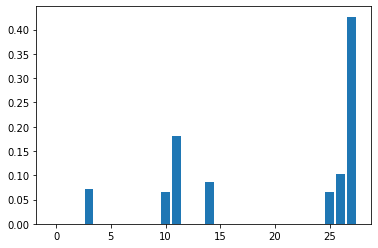

In [76]:
print('Initializing xgboost.sklearn.XGBClassifier and starting training...')

st = datetime.now()

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)

clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)

print(datetime.now()-st)

y_pred = clf.predict(X_test)
submission_file_name = 'Submission_down_'

accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
print("Accuracy: %.10f%%" % (accuracy * 100.0))
submission_file_name = submission_file_name + ("_Accuracy_%.6f" % (accuracy * 100)) + '_'

accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
submission_file_name = submission_file_name + ("_ROC-AUC_%.6f" % (accuracy_per_roc_auc * 100))

final_pred = pd.DataFrame(clf.predict_proba(np.array(finalTest)))
dfSub = pd.concat([test_loan_id, final_pred.ix[:, 1:2]], axis=1)
dfSub.rename(columns={1:'m13'}, inplace=True)
listc = list(dfSub['m13'])
for i in range(len(listc)):
    if (listc[i] < 0.3):
        listc[i] = 0
    else:
        listc[i] = 1

dfSub['m13'] = listc
dfSub.to_csv((('%s.csv') % (submission_file_name)), index=False)

import matplotlib.pyplot as plt
print(clf.feature_importances_)
idx = 0
for x in list(final_train):
    print('%d %s' % (idx, x))
    idx = idx + 1
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

In [79]:
# Split train and cross validation sets
X_train, X_test, y_train, y_test = train_test_split(np.array(final_train), np.array(train_target), test_size=0.30)
eval_set=[(X_test, y_test)]

In [80]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

/home/kuamrgaurav/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Initializing xgboost.sklearn.XGBClassifier and starting training...


/home/kuamrgaurav/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.902578
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.902412
[2]	validation_0-auc:0.902816
[3]	validation_0-auc:0.891982
[4]	validation_0-auc:0.889924
[5]	validation_0-auc:0.889841
[6]	validation_0-auc:0.887754
[7]	validation_0-auc:0.886951
[8]	validation_0-auc:0.891492
[9]	validation_0-auc:0.884359
[10]	validation_0-auc:0.894906
[11]	validation_0-auc:0.894624
[12]	validation_0-auc:0.889826
[13]	validation_0-auc:0.893477
[14]	validation_0-auc:0.896034
[15]	validation_0-auc:0.89786
[16]	validation_0-auc:0.898545
[17]	validation_0-auc:0.897427
[18]	validation_0-auc:0.896449
[19]	validation_0-auc:0.899514
[20]	validation_0-auc:0.901406
[21]	validation_0-auc:0.904024
[22]	validation_0-auc:0.904503
[23]	validation_0-auc:0.902788
[24]	validation_0-auc:0.903407
[25]	validation_0-auc:0.902875
[26]	validation_0-auc:0.902254
[27]	validation_0-auc:0.901811
[28]	validation_0-auc:0.901114
[29]	validation_0-auc:0.901244
[30]	validation_0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/home/kuamrgaurav/.local/lib/python3.6/site-packages/pandas/core/indexing.py:808: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


[0.00425787 0.01234369 0.00202817 0.00273442 0.00302526 0.00266818
 0.00664502 0.00403346 0.001592   0.08407169 0.00094018 0.01325476
 0.00444833 0.00154552 0.00300441 0.00320672 0.00576838 0.00127402
 0.         0.00541788 0.0009192  0.00103437 0.00333222 0.00162461
 0.00751253 0.00640351 0.05495468 0.7619589 ]
0 loan_id
1 source
2 financial_institution
3 interest_rate
4 unpaid_principal_bal
5 loan_term
6 origination_date
7 first_payment_date
8 loan_to_value
9 number_of_borrowers
10 debt_to_income_ratio
11 borrower_credit_score
12 loan_purpose
13 insurance_percent
14 co-borrower_credit_score
15 insurance_type
16 m1
17 m2
18 m3
19 m4
20 m5
21 m6
22 m7
23 m8
24 m9
25 m10
26 m11
27 m12


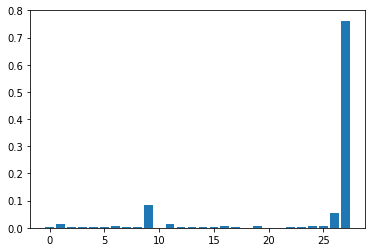

In [81]:
print('Initializing xgboost.sklearn.XGBClassifier and starting training...')

st = datetime.now()

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)

clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)

print(datetime.now()-st)

y_pred = clf.predict(X_test)
submission_file_name = 'Submission_'

accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
print("Accuracy: %.10f%%" % (accuracy * 100.0))
submission_file_name = submission_file_name + ("%.6f" % (accuracy * 100)) + '_'

accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
submission_file_name = submission_file_name + ("_ROC-AUC_%.6f" % (accuracy_per_roc_auc * 100))

final_pred = pd.DataFrame(clf.predict_proba(np.array(finalTest)))
dfSub = pd.concat([test_loan_id, final_pred.ix[:, 1:2]], axis=1)
dfSub.rename(columns={1:'m13'}, inplace=True)
listc = list(dfSub['m13'])
for i in range(len(listc)):
    if (listc[i] < 0.3):
        listc[i] = 0
    else:
        listc[i] = 1

dfSub['m13'] = listc
dfSub.to_csv((('%s.csv') % (submission_file_name)), index=False)

import matplotlib.pyplot as plt
print(clf.feature_importances_)
idx = 0
for x in list(final_train):
    print('%d %s' % (idx, x))
    idx = idx + 1
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

In [82]:
# Split train and cross validation sets
X_train, X_test, y_train, y_test = train_test_split(np.array(final_train), np.array(train_target), test_size=0.30)
eval_set=[(X_test, y_test)]

In [83]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

/home/kuamrgaurav/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Initializing xgboost.sklearn.XGBClassifier and starting training...


/home/kuamrgaurav/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.859025
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.859111
[2]	validation_0-auc:0.865709
[3]	validation_0-auc:0.867012
[4]	validation_0-auc:0.866505
[5]	validation_0-auc:0.865737
[6]	validation_0-auc:0.86598
[7]	validation_0-auc:0.86696
[8]	validation_0-auc:0.866129
[9]	validation_0-auc:0.8709
[10]	validation_0-auc:0.868516
[11]	validation_0-auc:0.870163
[12]	validation_0-auc:0.87166
[13]	validation_0-auc:0.871925
[14]	validation_0-auc:0.87088
[15]	validation_0-auc:0.870861
[16]	validation_0-auc:0.87043
[17]	validation_0-auc:0.871721
[18]	validation_0-auc:0.873403
[19]	validation_0-auc:0.874031
[20]	validation_0-auc:0.873907
[21]	validation_0-auc:0.873593
[22]	validation_0-auc:0.873726
[23]	validation_0-auc:0.873105
[24]	validation_0-auc:0.873778
[25]	validation_0-auc:0.873872
[26]	validation_0-auc:0.874283
[27]	validation_0-auc:0.874076
[28]	validation_0-auc:0.873895
[29]	validation_0-auc:0.873856
[30]	validation_0-auc:0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/home/kuamrgaurav/.local/lib/python3.6/site-packages/pandas/core/indexing.py:808: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


[0.0016062  0.00591059 0.00194214 0.00451354 0.00121931 0.00163993
 0.00258214 0.0112362  0.00176667 0.09675435 0.00102371 0.00595879
 0.0063429  0.00172019 0.00118155 0.00122654 0.00219205 0.00096736
 0.         0.00528084 0.00461758 0.00221366 0.00230996 0.00619247
 0.00341484 0.02926458 0.08467098 0.71225095]
0 loan_id
1 source
2 financial_institution
3 interest_rate
4 unpaid_principal_bal
5 loan_term
6 origination_date
7 first_payment_date
8 loan_to_value
9 number_of_borrowers
10 debt_to_income_ratio
11 borrower_credit_score
12 loan_purpose
13 insurance_percent
14 co-borrower_credit_score
15 insurance_type
16 m1
17 m2
18 m3
19 m4
20 m5
21 m6
22 m7
23 m8
24 m9
25 m10
26 m11
27 m12


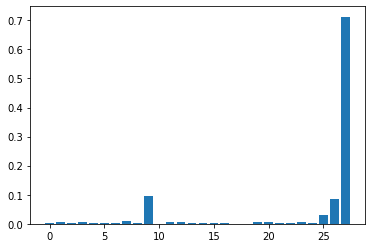

In [88]:
print('Initializing xgboost.sklearn.XGBClassifier and starting training...')

st = datetime.now()

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)

clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)

print(datetime.now()-st)

y_pred = clf.predict(X_test)
submission_file_name = 'Submission_'

accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
print("Accuracy: %.10f%%" % (accuracy * 100.0))
submission_file_name = submission_file_name + ("%.6f" % (accuracy * 100)) + '_'

accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
submission_file_name = submission_file_name + ("_ROC_%.6f" % (accuracy_per_roc_auc * 100))

final_pred = pd.DataFrame(clf.predict_proba(np.array(finalTest)))
dfSub = pd.concat([test_loan_id, final_pred.ix[:, 1:2]], axis=1)
dfSub.rename(columns={1:'m13'}, inplace=True)
listc = list(dfSub['m13'])
for i in range(len(listc)):
    if (listc[i] < 0.6):
        listc[i] = 0
    else:
        listc[i] = 1

dfSub['m13'] = listc
dfSub.to_csv((('%s.csv') % (submission_file_name)), index=False)

import matplotlib.pyplot as plt
print(clf.feature_importances_)
idx = 0
for x in list(final_train):
    print('%d %s' % (idx, x))
    idx = idx + 1
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()